## TAXI GAME (Reinforcement Learning)



**Importing essential libraires**

*we will be using OpenAi gym for using Taxi environment*

In [1]:
import gym
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from time import sleep

In [2]:
#environment initialisation
env = gym.make("Taxi-v3")
print("Environment_states-------------->",env.observation_space)
print("Enviroment_actions-------------->",env.action_space)



Environment_states--------------> Discrete(500)
Enviroment_actions--------------> Discrete(6)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
#particular instance analysis
state =123
action = 1
print("Instant_stats",env.P[state][action][0]) # (probability_of_step,resulting_state,reward,done)

Instant_stats (1.0, 23, -1, False)


## Comparision between random play and playing using Q learning algorithm

**Creating a random agent for random play and analyse the statistics**

****

In [11]:
class Random_Agent:
  def __init__(self,env):
    self.env = env
  def get_action(self,state):
    return self.env.action_space.sample()

agent = Random_Agent(env)



*Collecting frames and displaying them as a gameplay*

In [12]:
def collect_info (env,state):
  env.reset()
  env.s = state
  frames = []
  penalties,epochs = 0,0
  done = False
  while not done :
    action = agent.get_action(state)
    new_state,reward,done,info = env.step(action)
    if reward == -10:
      penalties+=1
    frames.append({
        "frames" : env.render(mode="ansi"),
        "state" : new_state,
        "action" : action,
        "reward" : reward,
        "done" : done,
        "penalties" : penalties
    })
    state = new_state
    epochs += 1
  return frames,epochs

def display_frames_list(frames):
  for i,frame in enumerate(frames):
    clear_output(wait=True)
    print(frame["frames"])
    print(f"State : {frame['state']}")
    print(f"Action : {frame['action']}")
    print(f"Reward : {frame['reward']}")
    print(f"Done : {frame['done']}")
    print(f"Penalties : {frame['penalties']}")
    sleep(.1)

display_frames_list(collect_info(env,123)[0])





+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

State : 211
Action : 3
Reward : -1
Done : True
Penalties : 62


*last frame of the gameplay*

100
100


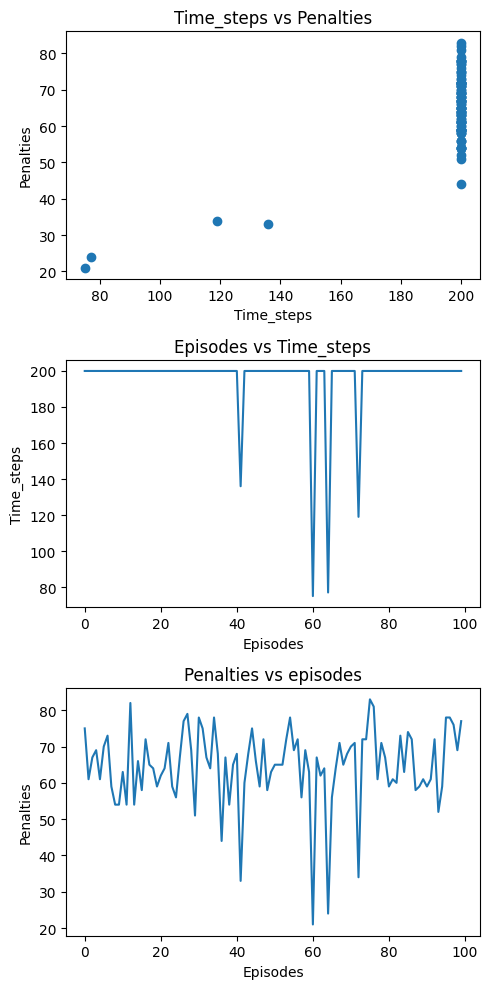

Average_time_required_to_complete 196.07
Average_penalties 64.56


In [13]:
# Looking at stats
episodes = 100
time_steps_required = []
penalties = []
for _ in range (episodes):
  frames,epochs = collect_info(env,120)
  time_steps_required.append(epochs)
  penalties.append(frames[-1]["penalties"])

print(len(time_steps_required))
print(len(penalties))

fig,ax = plt.subplots(3,1,figsize=(5,10))
ax[0].plot(time_steps_required,penalties,"o")
ax[0].set_title("Time_steps vs Penalties")
ax[0].set_xlabel("Time_steps")
ax[0].set_ylabel("Penalties")
ax[1].plot(time_steps_required)
ax[1].set_title("Episodes vs Time_steps")
ax[1].set_xlabel("Episodes")
ax[1].set_ylabel("Time_steps")
ax[2].plot(penalties)
ax[2].set_title("Penalties vs episodes")
ax[2].set_xlabel("Episodes")
ax[2].set_ylabel("Penalties")
plt.tight_layout()
plt.show()


print("Average_time_required_to_complete",sum(time_steps_required)/episodes)
print("Average_penalties",sum(penalties)/episodes )

## It is quite a charm of luck , So let us dive into some mindful steps rather than chances

**Creating an agent that follows Q learning algorithm to optimise gameplay**

In [7]:
class QAgent :
  def __init__(self,env,alpha,gamma):
    self.env = env
    self.alpha  = alpha
    self.gamma = gamma
    self.q_table = np.zeros([env.observation_space.n,env.action_space.n])
  def get_action(self,state):
    return np.argmax(self.q_table[state])
  def update_parameters(self,state,action,reward,new_state):
    old_value =self.q_table[state,action]
    next_max = np.max(self.q_table[new_state])
    new_value = old_value + self.alpha *(reward + self.gamma * next_max - old_value)

    self.q_table[state,action] = new_value

agent_1 = QAgent(env,0.5,0.6)



In [8]:
def collect_info_1 (env,state,epsilon):
  env.reset()
  env.s = state
  frames = []
  penalties,epochs = 0,0
  done = False
  while not done :
    if epsilon > np.random.uniform(0,1):
      action = env.action_space.sample()
    else:
      action = agent_1.get_action(state)
    new_state,reward,done,info = env.step(action)
    agent_1.update_parameters(state,action,reward,new_state)
    if reward == -10:
      penalties+=1
    frames.append({
        "frames" : env.render(mode="ansi"),
        "state" : new_state,
        "action" : action,
        "reward" : reward,
        "done" : done,
        "penalties" : penalties
    })
    state = new_state
    epochs += 1
  return frames,epochs
def display_frames_list(frames):
  for i,frame in enumerate(frames):
    clear_output(wait=True)
    print(frame["frames"])
    print(f"State : {frame['state']}")
    print(f"Action : {frame['action']}")
    print(f"Reward : {frame['reward']}")
    print(f"Done : {frame['done']}")
    print(f"Penalties : {frame['penalties']}")
    sleep(.1)

display_frames_list(collect_info_1(env,123,0.2)[0])

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

State : 383
Action : 0
Reward : -1
Done : True
Penalties : 39


*last frame of the gameplay*

100
100


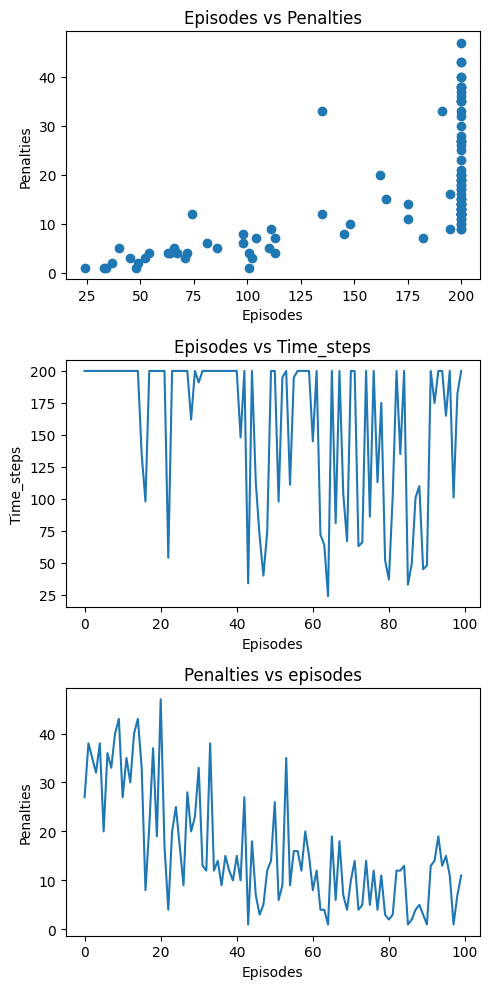

Average_time_required_to_complete 159.14
Average_penalties 16.16


In [9]:
# Looking at stats
episodes = 100

time_steps_required = []
penalties = []
for _ in range (episodes):
  frames,epochs = collect_info_1(env,120,0.2)
  time_steps_required.append(epochs)
  penalties.append(frames[-1]["penalties"])

print(len(time_steps_required))
print(len(penalties))

fig,ax = plt.subplots(3,1,figsize=(5,10))
ax[0].plot(time_steps_required,penalties,"o")
ax[0].set_title("Episodes vs Penalties")
ax[0].set_xlabel("Episodes")
ax[0].set_ylabel("Penalties")
ax[1].plot(time_steps_required)
ax[1].set_title("Episodes vs Time_steps")
ax[1].set_xlabel("Episodes")
ax[1].set_ylabel("Time_steps")
ax[2].plot(penalties)
ax[2].set_title("Penalties vs episodes")
ax[2].set_xlabel("Episodes")
ax[2].set_ylabel("Penalties")
plt.tight_layout()
plt.show()


print("Average_time_required_to_complete",sum(time_steps_required)/episodes)
print("Average_penalties",sum(penalties)/episodes )

**Generating random series of hyperparameters and analysing the gameplay through penalty stats**

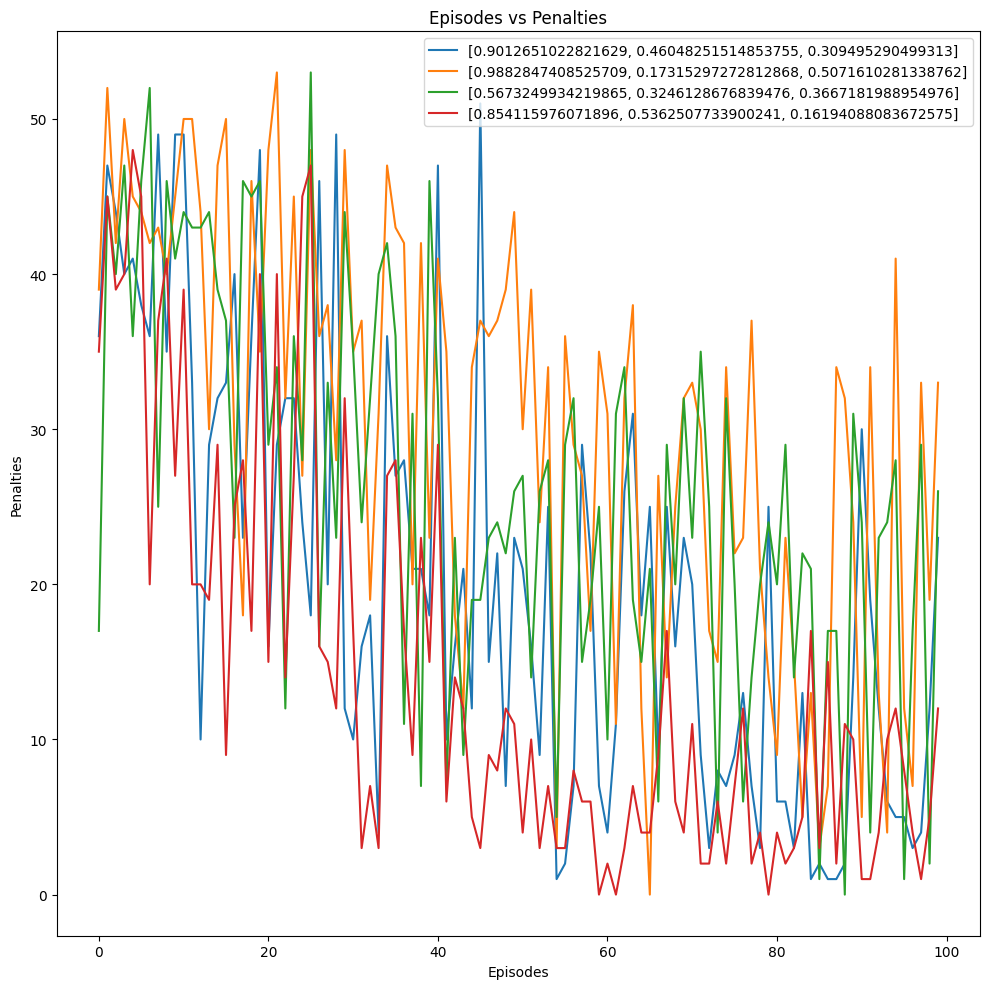

In [10]:
series = 4
hyperparameters = []
final_penalties = []
for i in range (series):
  alpha = np.random.uniform(0,1)
  gamma = np.random.uniform(0,1)
  epsilon = np.random.uniform(0,1)
  hyperparameters.append([alpha,gamma,epsilon])
  agent_1 = QAgent(env,alpha,gamma)
  episodes = 100

  time_steps_required = []
  penalties = []
  for _ in range (episodes):
    frames,epochs = collect_info_1(env,120,epsilon)
    time_steps_required.append(epochs)
    penalties.append(frames[-1]["penalties"])
  final_penalties.append(penalties)
plt.figure(figsize=(10,10))
for i in range(series):
  plt.plot(final_penalties[i])
  plt.title("Episodes vs Penalties")
  plt.xlabel("Episodes")
  plt.ylabel("Penalties")
  plt.legend(hyperparameters)
plt.tight_layout()
plt.show()


## Hence , we are completed through the full walkthrough analysing how an agent learns to play basic games using Q learning  